## 11단원 실습
날  짜 : 2025.10.29.수요일 (9주차 실습) <br>
작성자 : 문효원 <br>
학  번 : 202311398 <br>
*****

### 1. Time 서버
time_server.py

In [ ]:
import socket
import time

s = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
address = ('localhost', 5000)
s.bind(address)
s.listen(5)

while True:
    client, addr = s.accept()
    print("Connection requested from", addr)
    client.send(time.ctime(time.time()).encode())
    client.close()

> telnet 사용이 불가능 하다면 cmd를 관리자 권한으로 다음 명령어 입력<br>
dism /online /Enable-Feature /FeatureName:TelnetClient

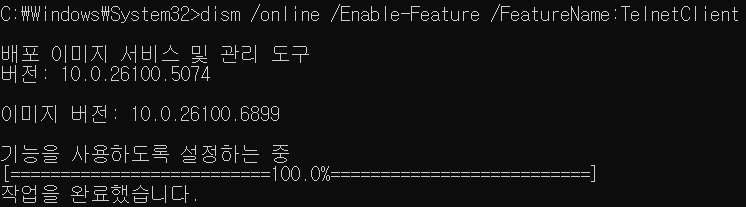

In [4]:
telnet localhost 5000

SyntaxError: invalid syntax (798279733.py, line 1)

서버 응답 : <br>
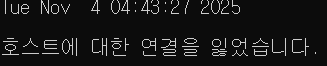

서버측 : <br>
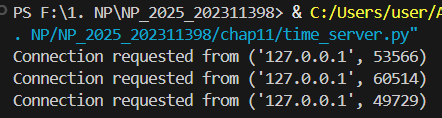

time_client.py

In [8]:
import socket

sock = socket.socket(socket.AF_INET, socket.SOCK_STREAM) 
address = ("localhost", 5000)
sock.connect((address))
print("현재 시각: ", sock.recv(1024).decode())

현재 시각:  Tue Nov  4 04:53:08 2025


### 2. Echo 서버
echo_server.py

In [ ]:
from socket import *

PORT = 2500
BUFSIZE = 1024

with socket(AF_INET, SOCK_STREAM) as sock:
    sock.setsockopt(SOL_SOCKET, SO_REUSEADDR, 1)  # 포트 재사용
    sock.bind(('localhost', PORT))                # 종단점 주소 바인딩
    sock.listen(1)                                # 대기열 크기 1
    print(f"Listening on localhost:{PORT}")

    while True:
        conn, (remotehost, remoteport) = sock.accept()  # 연결 수락
        print('Connected by', remotehost, remoteport)
        with conn:
            while True:
                data = conn.recv(BUFSIZE)               # 데이터 수신(바이트)
                if not data:                            # 빈 바이트면 종료
                    break
                print("Received message:", data.decode(errors='ignore'))
                conn.sendall(data)                      # 에코(그대로 다시 전송)
        print("Connection closed")

echo_client.py

In [10]:
# echo_client.py
import socket

BUFSIZE = 1024

def main():
    try:
        port = int(input("Port No: ").strip())
    except ValueError:
        print("포트 번호는 정수여야 합니다.")
        return

    address = ("localhost", port)  # 서버 주소와 포트 번호

    with socket.socket(socket.AF_INET, socket.SOCK_STREAM) as s:
        try:
            s.connect(address)  # 서버 연결 요청
            print(f"Connected to {address[0]}:{address[1]}")
            print("메시지를 입력하세요. 종료하려면 'quit' 또는 'exit' 입력.")
        except OSError as e:
            print(f"서버에 연결할 수 없습니다: {e}")
            return

        try:
            while True:
                msg = input("Message to send: ")

                # 종료 명령
                if msg.strip().lower() in ("quit", "exit"):
                    print("클라이언트를 종료합니다.")
                    break

                # 빈 입력은 전송하지 않음
                if not msg:
                    continue

                # 메시지 전송
                s.sendall(msg.encode("utf-8"))

                # 서버로부터 수신
                data = s.recv(BUFSIZE)
                if not data:
                    print("서버가 연결을 종료했습니다.")
                    break

                print("Received message:", data.decode("utf-8", errors="ignore"))
        except KeyboardInterrupt:
            print("\n사용자 중지로 종료합니다.")

if __name__ == "__main__":
    main()

Connected to localhost:2500
메시지를 입력하세요. 종료하려면 'quit' 또는 'exit' 입력.
Received message: Hi
Received message: oh
Received message: 안녕
Received message:  
Received message: c
클라이언트를 종료합니다.


실행 화면 : <br>
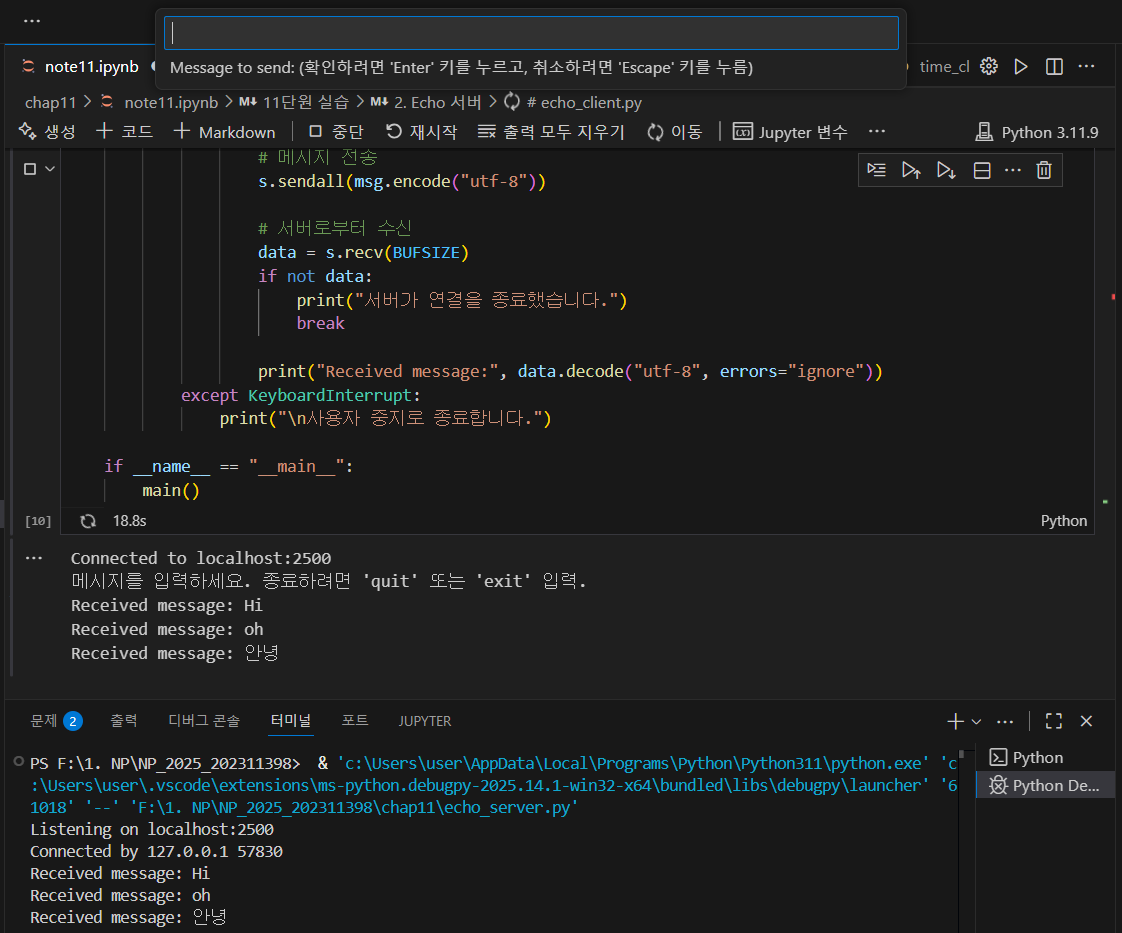

TCP_Process_Server.py

In [ ]:
# TCP_Process_Server.py
import socket

# 숫자 문자열 -> 영어 단어 매핑
TABLE = {
    '1': 'one', '2': 'two', '3': 'three', '4': 'four',
    '5': 'five', '6': 'six', '7': 'seven', '8': 'eight',
    '9': 'nine', '10': 'ten'
}

HOST = ""        # 빈 문자열이면 모든 인터페이스(0.0.0.0)
PORT = 2500
BUFSIZE = 1024

with socket.socket(socket.AF_INET, socket.SOCK_STREAM) as s:
    s.setsockopt(socket.SOL_SOCKET, socket.SO_REUSEADDR, 1)
    s.bind((HOST, PORT))
    s.listen(1)
    print(f"Waiting... (listening on {HOST or '0.0.0.0'}:{PORT})")

    c_socket, c_addr = s.accept()
    print("Connection from", c_addr)

    with c_socket:
        while True:
            data = c_socket.recv(BUFSIZE)
            if not data:
                # 클라이언트가 연결 종료
                break

            key = data.decode("utf-8", errors="ignore").strip()
            if key.lower() in ("quit", "exit"):
                c_socket.sendall(b"Bye\r\n")
                break

            resp = TABLE.get(key)
            if resp is None:
                c_socket.sendall(b"Try again\r\n")
            else:
                c_socket.sendall((resp + "\r\n").encode("utf-8"))

    print("Connection closed")

TCP_Process_Client.py

In [16]:
# TCP_Process_Client.py
import socket

HOST = "localhost"   # 서버 주소 (동일 PC면 localhost)
PORT = 2500          # 서버 포트 (서버 코드와 동일)
BUFSIZE = 1024

def main():
    try:
        with socket.create_connection((HOST, PORT), timeout=5) as s:
            print(f"Connected to {HOST}:{PORT}")
            print("1~10 사이 숫자를 입력하세요. 종료하려면 'quit' 또는 'exit' 입력.")
            while True:
                msg = input("Number> ").strip()
                if not msg:
                    continue

                # 종료 명령
                if msg.lower() in ("quit", "exit"):
                    s.sendall(msg.encode("utf-8"))
                    # 서버가 'Bye'를 보내면 출력하고 종료
                    resp = s.recv(BUFSIZE)
                    if resp:
                        print(resp.decode("utf-8", errors="ignore"), end="")
                    print("클라이언트를 종료합니다.")
                    break

                # 메시지 전송
                s.sendall(msg.encode("utf-8"))

                # 응답 수신
                data = s.recv(BUFSIZE)
                if not data:
                    print("서버가 연결을 종료했습니다.")
                    break
                print("Server:", data.decode("utf-8", errors="ignore"), end="")

    except (ConnectionRefusedError, TimeoutError, OSError) as e:
        print(f"서버에 연결할 수 없습니다: {e}")

if __name__ == "__main__":
    try:
        main()
    except KeyboardInterrupt:
        print("\n사용자 취소로 종료합니다.")

Connected to localhost:2500
1~10 사이 숫자를 입력하세요. 종료하려면 'quit' 또는 'exit' 입력.
Server: two
Server: six
Server: seven
Server: ten
Bye
클라이언트를 종료합니다.
